# Appendix 
## Pyrhon code for algebra calculation
### Peiji Tang & David Phelps

In [228]:
import sympy    #using sympy library to symbols calculation
sympy.init_printing()    #turn on Latex to express the answer more clearly
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.utilities.lambdify import lambdify #numerical implementation of algebra function

In [229]:
#variables for computing
(tau_phi,tau_theta,tau_psi,I_xx,I_yy,I_zz,omega_x,omega_y,omega_z,phi,theta,psi) = sympy.symbols('tau_phi tau_theta \
tau_psi I_xx I_yy \ I_zz omega_x omega_y omega_z phi theta psi')

#variables for input
(Omega_1,Omega_2,Omega_3,Omega_4,g,m,k_d,x,y,z,l,k,b) = sympy.symbols('Omega_1 Omega_2 Omega_3 Omega_4 g m k_d x y z l k b')

(xdot,ydot,zdot)=sympy.symbols('xdot ydot zdot')

In [230]:
def hat(x):
    return Matrix([[0,-x[2],x[1]],[x[2],0,-x[0]],[-x[1],x[0],0]])

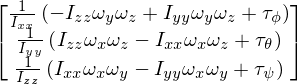

In [231]:
#inertia matrix:
In_Ma = Matrix([[I_xx,0,0],[0,I_yy,0],[0,0,I_zz]])
#torque:
Tau = Matrix([[tau_phi],[tau_theta],[tau_psi]])
#angular velocity:
Omega=Matrix([[omega_x],[omega_y],[omega_z]])

#angular acceleration:
dot_Omega = In_Ma.inv('LU')*( Tau - hat(Omega)*(In_Ma *Omega) )

dot_Omega

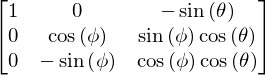

In [232]:
# conversion matrix from derivativesi of euler angles to angular velocity
C = Matrix([[1,0,-sympy.sin(theta)],[0,sympy.cos(phi),\
sympy.cos(theta)*sympy.sin(phi)],[0,-sympy.sin(phi),sympy.cos(theta)*sympy.cos(phi)]])
C

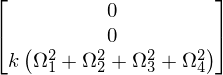

In [233]:
# thrust under body-fixed-frame
T_b = k*Matrix([[0],[0],[(Omega_1)**2+(Omega_2)**2+(Omega_3)**2\
                      +(Omega_4)**2]]) 
T_b

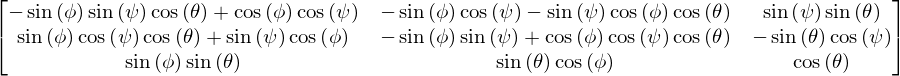

In [234]:
# constructing rotation matrix (3-1-3)
R = zeros(3,3)
R[0,0] = sympy.cos(phi)*sympy.cos(psi)-sympy.cos(theta)*\
sympy.sin(phi)*sympy.sin(psi)
R[0,1] = -sympy.cos(psi)*sympy.sin(phi)-sympy.cos(phi)*\
sympy.cos(theta)*sympy.sin(psi)
R[0,2] = sympy.sin(theta)*sympy.sin(psi)
R[1,0] = sympy.cos(theta)*sympy.cos(psi)*sympy.sin(phi)+\
sympy.cos(phi)*sympy.sin(psi)
R[1,1] = sympy.cos(phi)*sympy.cos(theta)*sympy.cos(psi)-\
sympy.sin(phi)*sympy.sin(psi)
R[1,2] = -sympy.cos(psi)*sympy.sin(theta)
R[2,0] = sympy.sin(phi)*sympy.sin(theta)
R[2,1] = sympy.cos(phi)*sympy.sin(theta)
R[2,2] = sympy.cos(theta)
R

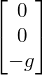

In [235]:
#gravity:
G = Matrix([[0],[0],[-g]])
G

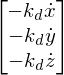

In [236]:
# drag force:
F_d = -k_d*Matrix([[xdot],[ydot],[zdot]])
F_d

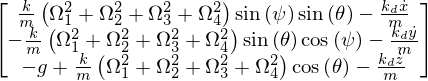

In [237]:
# calculate the dot_x2:
dot_x2 = G+R*T_b/m+F_d/m
dot_x2

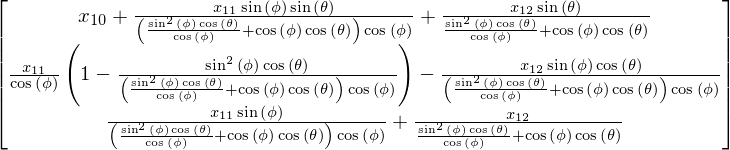

In [303]:
(x_10,x_11,x_12) = sympy.symbols('x_10 x_11 x_12')
x4 = Matrix([[x_10],[x_11],[x_12]])
# calculate dot_x3
dot_x3 = C.inv('LU')*x4
dot_x3

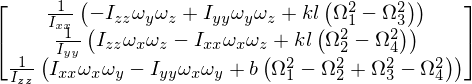

In [239]:
dot_x4 = zeros(3,1)
tau_phi = l*k*((Omega_1)**2-(Omega_3)**2)
tau_theta = l*k*((Omega_2)**2-(Omega_4)**2)
tau_psi = b*((Omega_1)**2-(Omega_2)**2+(Omega_3)**2-(Omega_4)**2)

dot_x4[0] = 1/I_xx*(-I_zz*omega_y*omega_z+I_yy*omega_y*omega_z +tau_phi )
dot_x4[1] = 1/I_yy*(I_zz*omega_x*omega_z - I_xx*omega_x*omega_z+tau_theta)
dot_x4[2] = 1/I_zz*(I_xx*omega_x*omega_y-I_yy*omega_x*omega_y+tau_psi)
#calculate the dot_x4:
dot_x4

In [240]:
f4 = dot_x2[0] #f4
f5 = dot_x2[1] #f5
f6 = dot_x2[2] #f6
# for some obvious value,directly put into matrix A
f4_4 = -0.534/0.468 # paritial f4 w.r.t x4
f4_7 = f4_8 = f4_9 =f4_10 = f4_11 = f4_12 = 0 

In [241]:
f5_8 = sympy.diff(f_5,theta) # paritial f5 w.r.t x8(theta)
f5_9 = sympy.diff(f_5,psi) # paritial f5 w.r.t x9(psi)

In [242]:
f7 = dot_x3[0]
f8 = dot_x3[1]
f9 = dot_x3[2]

In [243]:
f7_7 = sympy.diff(f7,phi) # paritial f7 w.r.t x7(phi)
f7_8 = sympy.diff(f7,theta) # paritial f7 w.r.t x8(theta)
f7_9 = sympy.diff(f7,psi) # paritial f7 w.r.t x9(psi)

f7_10 = sympy.diff(f7,x_10) 
f7_11 = sympy.diff(f7,x_11) 
f7_12 = sympy.diff(f7,x_12) 

In [244]:
f7_7_l = lambdify((x_11,x_12,phi,theta),f7_7) 
f7_7_l(0,0,0,0) # substitute x_11,x_12,phi,theta with equalibrium

f7_8_l = lambdify((x_11,x_12,phi,theta),f7_8)
f7_8_l(0,0,0,0)

In [245]:
f8_7 = sympy.diff(f8,phi) # paritial f8 w.r.t x7(phi)
f8_8 = sympy.diff(f8,theta) # paritial f8 w.r.t x8(theta)
f8_9= sympy.diff(f8,psi) # paritial f8 w.r.t x9(psi)

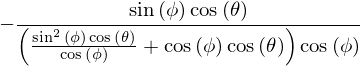

In [246]:
f8_7_l = lambdify((x_10,x_11,x_12,phi,theta),f8_7)
f8_7_l(0,0,0,0,0)

f8_8_l = lambdify((x_10,x_11,x_12,phi,theta),f8_8)
f8_8_l(0,0,0,0,0)

f8_10 = sympy.diff(f8,x_10)
f8_11 = sympy.diff(f8,x_11)
f8_11_l  = lambdify((x_10,x_11,x_12,phi,theta),f8_11)
f8_11_l(0,0,0,0,0)
f8_12 = sympy.diff(f8,x_12)
f8_12

In [247]:
f9_7 = sympy.diff(f9,phi)
f9_8 = sympy.diff(f9,theta)
f9_9 = sympy.diff(f9,psi)

f9_7_l = lambdify((x_10,x_11,x_12,phi,theta),f9_7)
f9_7_l(0,0,0,0,0)

f9_8_l = lambdify((x_10,x_11,x_12,phi,theta),f9_8)
f9_8_l(0,0,0,0,0)

f9_10 = sympy.diff(f9,x_10)
f9_11 = sympy.diff(f9,x_11)
f9_12 = sympy.diff(f9,x_12)
f9_12_l = lambdify((x_10,x_11,x_12,phi,theta),f9_12)
f9_12_l(0,0,0,0,0)

In [248]:
f10 = dot_x4[0]
f11 = dot_x4[1]
f12 = dot_x4[2]

f10_10 = sympy.diff(f10,omega_x) #partial deriative w.r.t x10
f10_11 = sympy.diff(f10,omega_y)
f10_12 = sympy.diff(f10,omega_z)

f11_10 = sympy.diff(f11,omega_x)
f11_11 = sympy.diff(f11,omega_y)
f11_12 = sympy.diff(f11,omega_z)

f12_10 = sympy.diff(f12,omega_x)
f12_11 = sympy.diff(f12,omega_y)
f12_12 = sympy.diff(f12,omega_z)